# The Difference-in-Differences Model

`The Difference-in-Differences (DiD)` or `diff-in-diff` model is a statistical technique used in `econometrics` and other fields to estimate `causal effects` in observational studies. It is commonly employed when analyzing the impact of a `treatment` or intervention by comparing the changes in outcomes over time between a `treatment group` and a `control group`.

Suppose, we have a DataFrame with features: `'group'`, `'time_period'`, and `'outcome'`. 

- `'group'` is a binary indicator for the treatment group (`1 for treatment`, `0 for control`)

- `'time_period'` is a binary indicator for the post-treatment period (`1 for post-treatment`, `0 for pre-treatment`)

- `'outcome'` is the outcome variable

The key idea of DiD is that the treatment effect is estimated by comparing the changes in the treatment group with the changes in the control group over time.

***The basic equation for a Difference-in-Differences (DiD) model can be expressed as follows:***

$Y_{it} = \beta_0 + \beta_1 \text{group}_{i} + \beta_2 \text{time\_period}_{t} + \beta_3 (\text{group}_{i} \times \text{time\_period}_{t}) + \epsilon_{it}$

Where,
- $Y_{it}$ is the outcome variable for observation i at time t.

- $group_i$ is a binary indicator variable for whether observation $i$ received the treatment (1 for treatment group, 0 for control group).

- $time\_period_t$ is a binary indicator variable for whether the observation is in the `post-treatment` period or `pre_treatment` period(1 for post-treatment, 0 for pre-treatment).

- $\text{group}_{i} \times \text{time\_period}_{t}$ is the interaction term between treatment and post-treatment indicators.

- $β_0$ is the intercept, representing the average outcome in the control group during the pre-treatment period.

- $β_1$ is the average treatment effect on the control group during the pre-treatment period.

- $β_2$ is the average time effect on the control group.

- $β_3$ is the DiD estimator, representing the average treatment effect on the treated group. It shows the differnetial treatment effect.


we can insert the values of `group` and `time_period` using the table below and see that coefficient ($\beta_3$) of the interaction of `group` and `time_period` is the value for DID：

|              | Control Group (g=0) | Treatment Group (g=1)                   |                 |
|--------------|---------------------|-----------------------------------------|-----------------|
| Before (t=0) | $\beta_0$           | $\beta_0 + \beta_1$                     |                 |
| After (t=1)  | $\beta_0 + \beta_2$ | $\beta_0 + \beta_1 + \beta_2 + \beta_3$ |                 |
| Difference   | $\beta_2$           | $\beta_2 + \beta_3$                     | $\beta_3$ (DID) |

The goal is to estimate the DiD coefficient $(β_3)$, which captures the average treatment effect by comparing the change in outcomes over time between the treatment and control groups.

## Assumptions
The key assumption of the DiD model is the `parallel trends assumption`. It assumes that, in the absence of treatment, the average outcomes of the treatment and control groups would have followed a parallel trend.

## Practical Application:
- Econometricians use the DiD model to evaluate policy interventions, such as the impact of a new law or program on economic outcomes.

The DiD model is a powerful tool for estimating causal effects in observational data by leveraging the differences in trends over time between treated and control groups.

Here's a basic outline of how to implement a `Difference-in-Differences` model in Python using the statsmodels library:

The dataset is adapted from the dataset in [Card and Krueger (1994)](https://davidcard.berkeley.edu/papers/njmin-aer.pdf), which estimates the causal effect of an increase in the state minimum wage on the employment. 

- On April 1, 1992, New Jersey (`NJ`) raised the state minimum wage from 4.25 USD to 5.05 USD while the minimum wage in Pennsylvania (`PA`) stays the same at 4.25 USD. 
- Data about employment in fast-food restaurants in `NJ` and `PA` were collected in `February 1992` and in `November 1992`. 
- 384 restaurants in total after removing null values.

-  - `state` is `0 for the control group` (PA) and `1 for the treatment group` (NJ).
-  - `time` is `0 for before` (i.e., before April 1, 1992) and `1 for after` (i.e., after April 1, 1992).


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

## Load and prepare data

In [2]:
df = pd.read_csv('data/employment.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          384 non-null    int64  
 1   total_emp_feb  384 non-null    float64
 2   total_emp_nov  384 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.1 KB
None


,state,total_emp_feb,total_emp_nov
0,0,40.50,24.0
1,0,13.75,11.5
2,0,8.50,10.5
3,0,34.00,20.0
4,0,24.00,35.5


### Create dataframe before raising minimum wage

In [3]:
df_before = df[['state', 'total_emp_feb']]
df_before['time'] = 0
df_before.rename({'total_emp_feb' : 'emp'}, axis = 1, inplace = True)

print(df_before.info())
df_before.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   384 non-null    int64  
 1   emp     384 non-null    float64
 2   time    384 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.1 KB
None


,state,emp,time
0,0,40.50,0
1,0,13.75,0
2,0,8.50,0
3,0,34.00,0
4,0,24.00,0


### Create dataframe after raising minimum wage

In [4]:
df_after = df[['state', 'total_emp_nov']]
df_after['time'] = 1
df_after.rename({'total_emp_nov' : 'emp'}, axis  = 1, inplace= True)

print(df_after.info())
df_after.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   384 non-null    int64  
 1   emp     384 non-null    float64
 2   time    384 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.1 KB
None


,state,emp,time
0,0,24.0,1
1,0,11.5,1
2,0,10.5,1
3,0,20.0,1
4,0,35.5,1


### Connect together both dataframe row by row

In [5]:
df_all = pd.concat([df_before, df_after])
print(df_all.info())
df_all.head()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 383
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   768 non-null    int64  
 1   emp     768 non-null    float64
 2   time    768 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 24.0 KB
None


,state,emp,time
0,0,40.50,0
1,0,13.75,0
2,0,8.50,0
3,0,34.00,0
4,0,24.00,0


## Specify the model

`sm.OLS(' y ~ X' )`
- `y` is the dependent or target variable
- `X` is/are the explanatory (independent) variable/s. 

In [6]:
model = ols('emp ~ state*time', data=df_all).fit()
# state*time is a shortcut system in statsmodels.
# state*time means 'state', 'time', and 'state*time' are in together.

### Get model summary

In [7]:
print(model.summary())

# For more compact summary
# print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    emp   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.947
Date:                Sat, 27 Jan 2024   Prob (F-statistic):              0.121
Time:                        00:23:01   Log-Likelihood:                -2817.6
No. Observations:                 768   AIC:                             5643.
Df Residuals:                     764   BIC:                             5662.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3800      1.098     21.288      0.0

### Export model

In [8]:
# As text
with open('diff-in-diff.txt', 'w') as f:
    f.write(model.summary().as_text())

# # As csv
# with open('diff-in-diff.csv', 'w') as f:
#     f.write(model.summary().as_csv())

# # As html
# with open('diff-in-diff.html', 'w') as f:
#     f.write(model.summary().as_html())
    

## Graphical presentation

### Get all the parameters from the model

In [9]:
model.params

Intercept     23.380000
state         -2.949417
time          -2.283333
state:time     2.750000
dtype: float64

In [10]:
# model parameters

# beta_zero (intercept)
# 
# control_intercept = ols.params.Intercept
beta_zero = model.params.Intercept

# beta_one (parameter of group, i.e. treatment group and control group)
# Here I have used 'state' instead of group in the feature name.
# 
# treat_intercept_delta = ols.params.state
beta_one = model.params.state

# beta_two (parameter of time)
# 
# trend = ols.params.time
beta_two = model.params.time

# beta_three (DiD estimator)
# 
# Δ = ols.params['state:time']
beta_three = model.params['state:time']


# Before intervention, time dummy is zero, and
# Before intervention, time dummy is one
# So, 0.5 is used as a middle value.
intervention_time = 0.5

### Specify 1000 values for X-axis as `time` between -0.5 and 1.5

In [11]:
time = np.linspace(-0.5, 1.5, 1000)

### Define a function to measure the outcome
- Here's a helping function also to check if a group (i.e., state) is treated or not

In [12]:
def outcome(beta_zero, beta_one, state, beta_two, time, beta_three, treated):
    return beta_zero + (beta_one * state) + (beta_two * time) + (beta_three * state * treated)

In [13]:
def is_treated(time, intervention_time, state):
    return (time > intervention_time) * state

### Calculate `counterfact`, `treatment`, `control` values using `outcome` function

In [14]:
counterfact = outcome(
    beta_zero = beta_zero, 
    beta_one = beta_one, 
    state = 1, 
    beta_two = beta_two, 
    time = time, 
    beta_three = 0, 
    treated = is_treated(time, intervention_time, state = 1)    
)

In [15]:
treatment = outcome(
    beta_zero = beta_zero, 
    beta_one = beta_one, 
    state = 1, 
    beta_two = beta_two, 
    time = time, 
    beta_three = beta_three, 
    treated = is_treated(time, intervention_time, state = 1)    
)

In [16]:
control = outcome(
    beta_zero = beta_zero, 
    beta_one = beta_one, 
    state = 0, 
    beta_two = beta_two, 
    time = time, 
    beta_three = beta_three, 
    treated = is_treated(time, intervention_time, state = 0)    
)

### Plot them with extra features

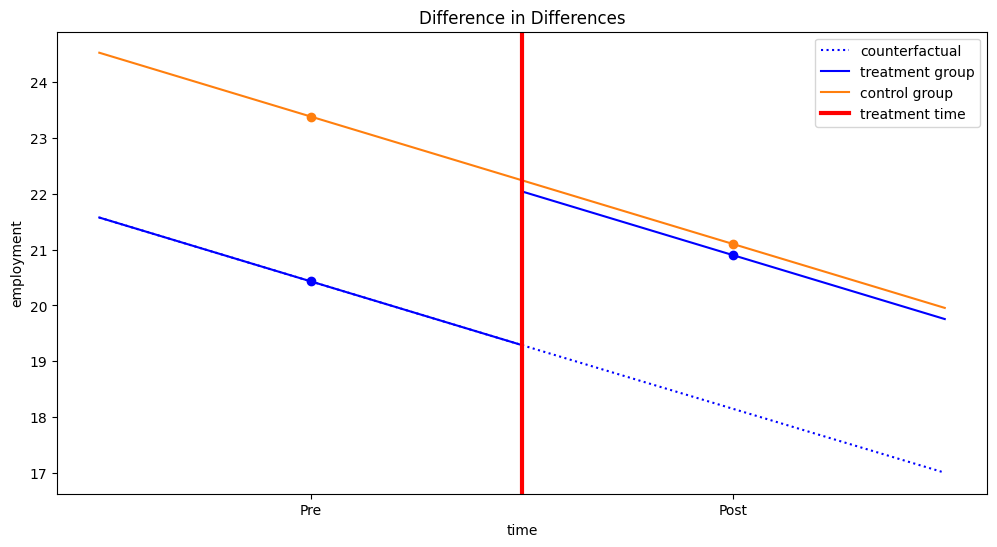

In [17]:
fig, ax = plt.subplots(figsize = (12, 6))

# plot for counterfactual
# If treatment do not have any effect
ax.plot(
    time,
    counterfact,
    color="blue",
    label="counterfactual",
    ls=":",
)

# Plot for treatment group( before and after the treatment)
ax.plot(
    time,
    treatment,
    color="blue",
    label="treatment group",
)

# Plot for control group( before and after the treatment)
ax.plot(
    time,
    control,
    color="C1",
    label="control group",
)

# Plot the vertical line in the middle of the pre-treatment and post-treatment
ax.axvline(x=intervention_time, ls="-", color="r", label="treatment time", lw=3)

# PLot 'filled point' on the above line plots
t = np.array([0, 1])

ax.plot(
    t,
    outcome(
        beta_zero = beta_zero, 
        beta_one = beta_one, 
        state = 1, 
        beta_two = beta_two, 
        time = t,
        beta_three = beta_three,
        treated = is_treated(t, intervention_time, state=1),
    ),
    "o",
    color="blue",
)

ax.plot(
    t,
    outcome(
        beta_zero = beta_zero, 
        beta_one = beta_one, 
        state = 0, 
        beta_two = beta_two, 
        time = t,
        beta_three = 0,
        treated = is_treated(t, intervention_time, state=0),
    ),
    "o",
    color="C1",
)

# PLot settings
ax.set(
    xlabel = "time",
    ylabel = "employment",
    xticks = t,
    xticklabels = ["Pre", "Post"],
    title = "Difference in Differences",
)
ax.legend();